In [1]:
from ellipse_rcnn.utils.conics import ellipse_angle, conic_center, ellipse_to_conic_matrix, bbox_ellipse
import torch

In [2]:
semimajor_axis, semiminor_axis = torch.tensor([5.0, 6.0]), torch.tensor([3.0, 4.0])
cx, cy = torch.tensor([1.0, 2.0]), torch.tensor([3.0, 4.0])
theta = torch.tensor([0.0, 0.0])

ellipse_matrices = ellipse_to_conic_matrix(semimajor_axis, semiminor_axis, cx, cy, theta)

expected_bbox = torch.tensor([[-4, 0.0, 6.0, 6.0], [-4.0, 0.0, 8.0, 8.0]])
calculated_bbox = bbox_ellipse(ellipse_matrices)

# assert torch.allclose(calculated_bbox, expected_bbox), "Bounding box calculation #1 failed"
expected_bbox, calculated_bbox

(tensor([[-4.,  0.,  6.,  6.],
         [-4.,  0.,  8.,  8.]]),
 tensor([[-4.,  0.,  6.,  6.],
         [-4.,  0.,  8.,  8.]]))

In [3]:
from typing import List
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Ellipse


def plot_bboxes_ellipses(_bboxes: np.ndarray, _theta: np.ndarray):
    """
    Plot the bounding boxes and ellipses on the image.

    Parameters
    ----------
    _bboxes
    _ellipses
    Returns
    -------

    """
    fig, ax = plt.subplots(1, figsize=(15, 25))
    ax.set_ylim(-10, 10)
    ax.set_xlim(-10, 10)
    ax.set_aspect('equal')

    for (x_min, y_min, x_max, y_max), t in zip(_bboxes, _theta):

        cx, cy, w, h  = x_min + (x_max - x_min) / 2, y_min + (y_max - y_min) / 2, x_max - x_min, y_max - y_min
        rect = Rectangle((x_min, y_min),
                                  w, h, fill=False, color="r")
        ax.add_patch(rect)

        ellipse = Ellipse((cx, cy), w, h, t, alpha=0.3)

        ax.add_patch(ellipse)

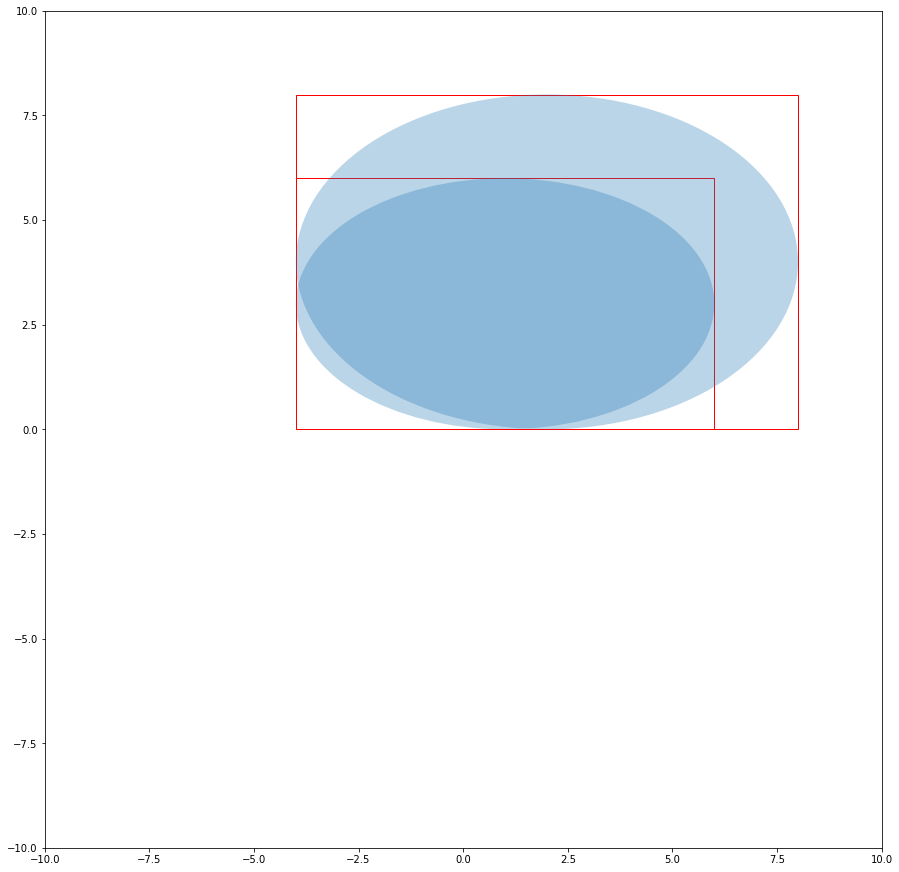

In [4]:

plot_bboxes_ellipses(calculated_bbox, theta)

In [5]:
from ellipse_rcnn.utils.viz import DetectionPlotter

tensor([[-4.,  0.,  6.,  6.],
        [-4.,  0.,  8.,  8.]])


<AxesSubplot:>

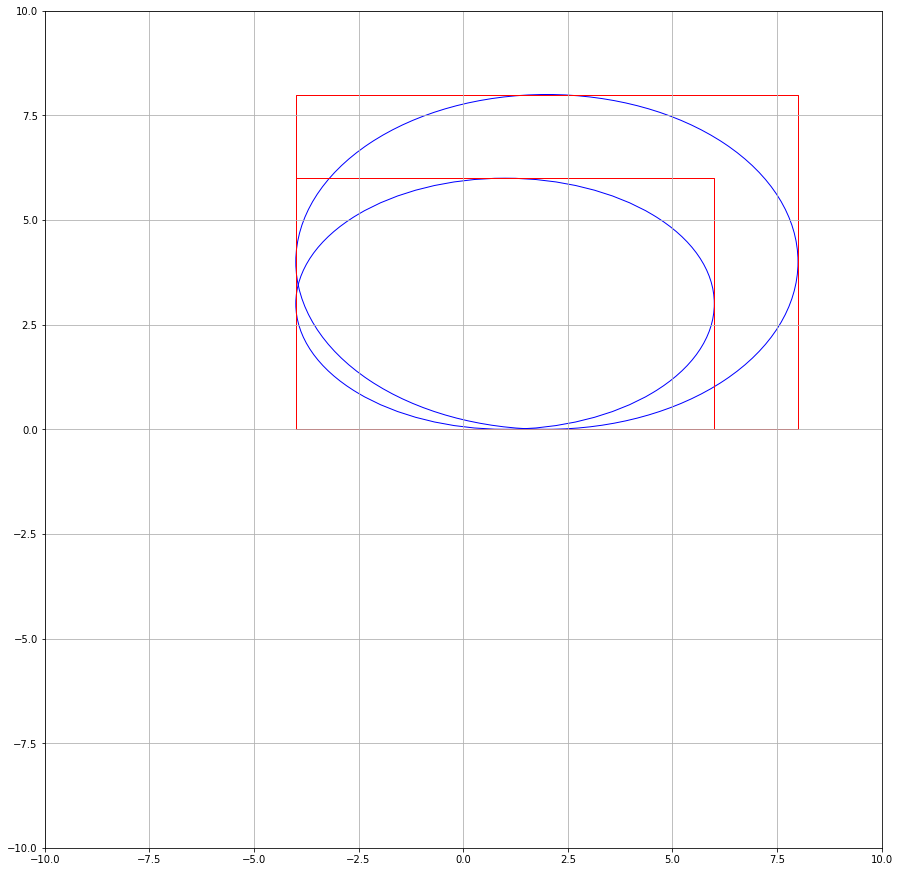

In [6]:
plotter = DetectionPlotter.from_ellipses(ellipse_matrices)

print(calculated_bbox)

fig, ax = plt.subplots(1, figsize=(15, 25))
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plotter.plot(ax)